# ***Hotel Reservations***

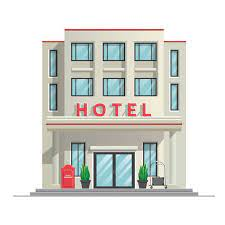

# Data Dictionary

* **Booking_ID**: unique identifier of each booking
* **no_of_adults**: Number of adults
* **no_of_children**: Number of Children
* **no_of_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **no_of_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* **type_of_meal_plan**: Type of meal plan booked by the customer:
* **required_car_parking_space**: Does the customer require a car parking space? (0 - No, 1- Yes)
* **room_type_reserved**: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* **lead_time**: Number of days between the date of booking and the arrival date
* **arrival_year**: Year of arrival date
* **arrival_month**: Month of arrival date
* **arrival_date**: Date of the month
* **market_segment_type**: Market segment designation.
* **repeated_guest**: Is the customer a repeated guest? (0 - No, 1- Yes)
* **no_of_previous_cancellations**: Number of previous bookings that were canceled by the customer prior to the current booking
* **no_of_previous_bookings_not_canceled**: Number of previous bookings not canceled by the customer prior to the current booking
* **avg_price_per_room**: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* **no_of_special_requests**: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* **booking_status**: Flag indicating if the booking was canceled or not

# Importing Libraries & Data

In [131]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
import pickle as pk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import xgboost as xgb
from imblearn.over_sampling import SMOTE

In [66]:
data=pd.read_csv('/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv')
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
data.shape

(36275, 19)

# Explore Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [7]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [8]:
data.describe(include='O').transpose()

,count,unique,top,freq
Booking_ID,36275,36275,INN00001,1
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


# Check Null Values

In [9]:
data.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [10]:
#all rows control for null values
data.isna().values.any()

False

# Duplicated values

In [11]:
data[data.duplicated()]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


In [67]:
data.drop('Booking_ID',axis=1,inplace=True)
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


# Data Analysis & Visualization

In [16]:
# check how many people have  booking_status or not
data['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

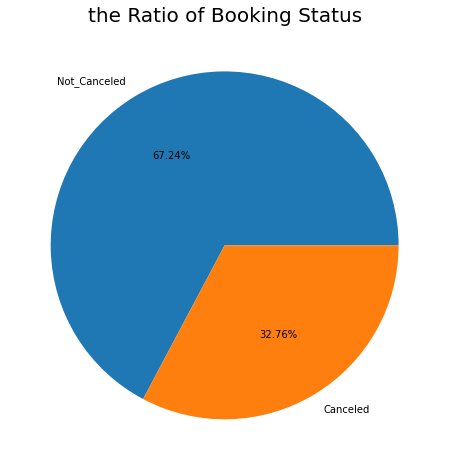

In [19]:
#show Ratio of HeartDisease from data
plt.figure(figsize=(8,8))
plt.pie(x = data['booking_status'].value_counts() ,autopct='%1.2f%%' ,labels=data['booking_status'].value_counts().index)
plt.title('the Ratio of Booking Status',fontsize=20)
plt.show

In [20]:
#how many no_of_adults
data['no_of_adults'].value_counts()

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

Text(0, 0.5, 'Count')

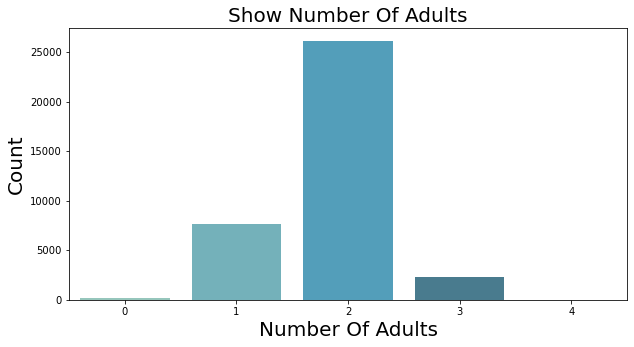

In [24]:
#show how many of no_of_adults
plt.figure(figsize=(10,5))
sns.countplot(x = data['no_of_adults'], palette='GnBu_d')
plt.title('Show Number Of Adults',fontsize=20)
plt.xlabel('Number Of Adults',fontsize=20)
plt.ylabel('Count',fontsize=20)

In [25]:
data.groupby(['no_of_adults','booking_status'])['booking_status'].count()

no_of_adults  booking_status
0             Canceled             44
              Not_Canceled         95
1             Canceled           1856
              Not_Canceled       5839
2             Canceled           9119
              Not_Canceled      16989
3             Canceled            863
              Not_Canceled       1454
4             Canceled              3
              Not_Canceled         13
Name: booking_status, dtype: int64

Text(0, 0.5, 'Count')

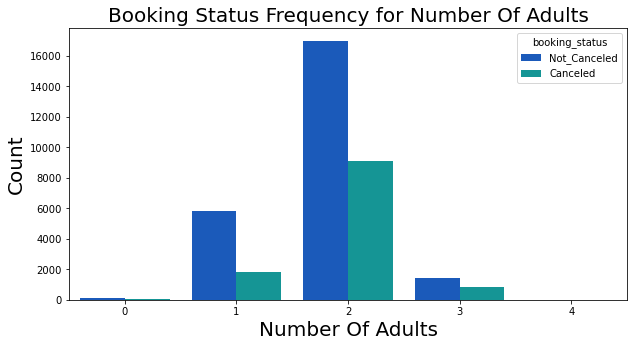

In [27]:
#show how many of no_of_adults
plt.figure(figsize=(10,5))
sns.countplot(x = data['no_of_adults'],hue=data['booking_status'], palette='winter')
plt.title('Booking Status Frequency for Number Of Adults',fontsize=20)
plt.xlabel('Number Of Adults',fontsize=20)
plt.ylabel('Count',fontsize=20)

In [28]:
#how many no_of_children
data['no_of_children'].value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

Text(0, 0.5, 'Count')

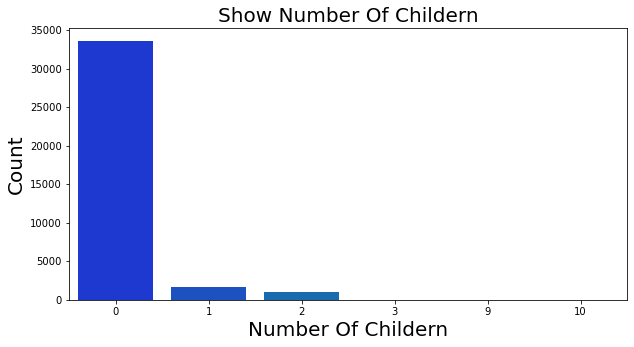

In [30]:
#show how many of no_of_children
plt.figure(figsize=(10,5))
sns.countplot(x = data['no_of_children'], palette='winter')
plt.title('Show Number Of Childern',fontsize=20)
plt.xlabel('Number Of Childern',fontsize=20)
plt.ylabel('Count',fontsize=20)

In [31]:
data.groupby(['no_of_children','booking_status'])['booking_status'].count()

no_of_children  booking_status
0               Canceled          10882
                Not_Canceled      22695
1               Canceled            540
                Not_Canceled       1078
2               Canceled            457
                Not_Canceled        601
3               Canceled              5
                Not_Canceled         14
9               Canceled              1
                Not_Canceled          1
10              Not_Canceled          1
Name: booking_status, dtype: int64

In [32]:
data.groupby(['no_of_children','no_of_adults','booking_status'])['booking_status'].count()

no_of_children  no_of_adults  booking_status
0               1             Canceled           1809
                              Not_Canceled       5742
                2             Canceled           8213
                              Not_Canceled      15506
                3             Canceled            857
                              Not_Canceled       1434
                4             Canceled              3
                              Not_Canceled         13
1               0             Not_Canceled          1
                1             Canceled             23
                              Not_Canceled         67
                2             Canceled            511
                              Not_Canceled        991
                3             Canceled              6
                              Not_Canceled         19
2               0             Canceled             44
                              Not_Canceled         89
                1             Cancele

Text(0, 0.5, 'Count')

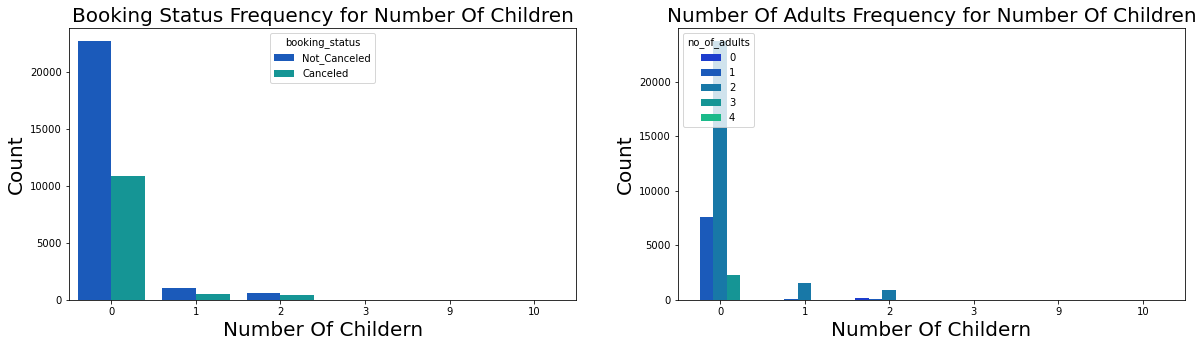

In [37]:
#show how many of no_of_children
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x = data['no_of_children'],hue=data['booking_status'], palette='winter')
plt.title('Booking Status Frequency for Number Of Children',fontsize=20)
plt.xlabel('Number Of Childern',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(1,2,2)
sns.countplot(x = data['no_of_children'],hue=data['no_of_adults'], palette='winter')
plt.title('Number Of Adults Frequency for Number Of Children',fontsize=20)
plt.xlabel('Number Of Childern',fontsize=20)
plt.ylabel('Count',fontsize=20)

In [38]:
#how many no_of_weekend_nights
data['no_of_weekend_nights'].value_counts()

0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

In [39]:
data.groupby(['no_of_weekend_nights','booking_status'])['booking_status'].count()

no_of_weekend_nights  booking_status
0                     Canceled           5093
                      Not_Canceled      11779
1                     Canceled           3432
                      Not_Canceled       6563
2                     Canceled           3157
                      Not_Canceled       5914
3                     Canceled             74
                      Not_Canceled         79
4                     Canceled             83
                      Not_Canceled         46
5                     Canceled             29
                      Not_Canceled          5
6                     Canceled             16
                      Not_Canceled          4
7                     Canceled              1
Name: booking_status, dtype: int64

Text(0, 0.5, 'Count')

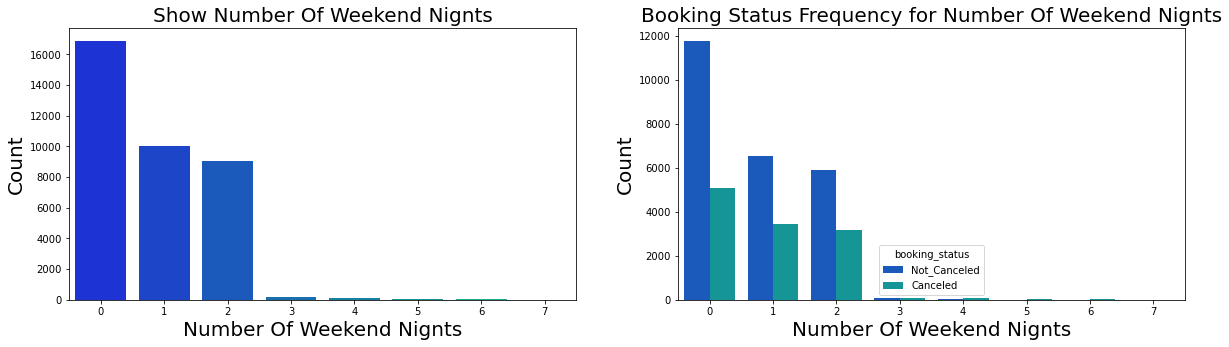

In [41]:
#show how many of no_of_children
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x = data['no_of_weekend_nights'], palette='winter')
plt.title('Show Number Of Weekend Nignts',fontsize=20)
plt.xlabel('Number Of Weekend Nignts',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(1,2,2)
sns.countplot(x = data['no_of_weekend_nights'],hue=data['booking_status'], palette='winter')
plt.title('Booking Status Frequency for Number Of Weekend Nignts',fontsize=20)
plt.xlabel('Number Of Weekend Nignts',fontsize=20)
plt.ylabel('Count',fontsize=20)

In [42]:
#how many no_of_week_nights
data['no_of_week_nights'].value_counts()

2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64

In [44]:
data.groupby(['no_of_week_nights','booking_status'])['booking_status'].count()

no_of_week_nights  booking_status
0                  Canceled           679
                   Not_Canceled      1708
1                  Canceled          2572
                   Not_Canceled      6916
2                  Canceled          3997
                   Not_Canceled      7447
3                  Canceled          2574
                   Not_Canceled      5265
4                  Canceled          1143
                   Not_Canceled      1847
5                  Canceled           632
                   Not_Canceled       982
6                  Canceled            88
                   Not_Canceled       101
7                  Canceled            52
                   Not_Canceled        61
8                  Canceled            32
                   Not_Canceled        30
9                  Canceled            21
                   Not_Canceled        13
10                 Canceled            53
                   Not_Canceled         9
11                 Canceled            14


Text(0, 0.5, 'Count')

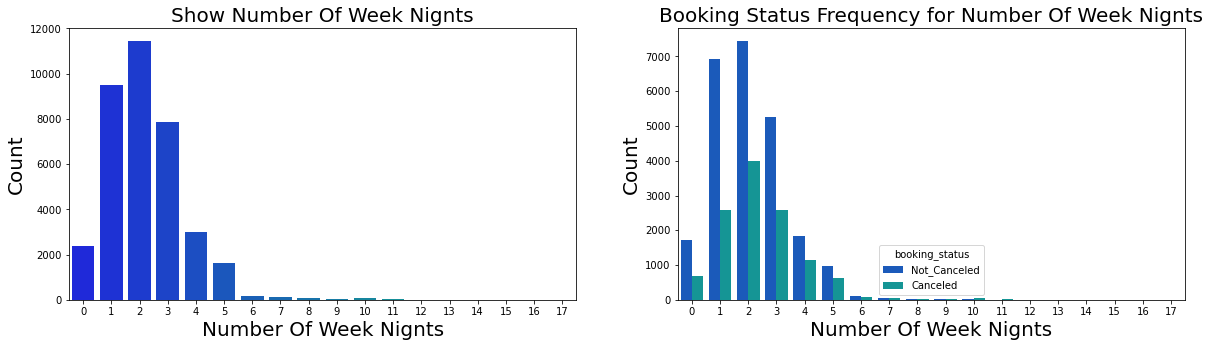

In [45]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x = data['no_of_week_nights'], palette='winter')
plt.title('Show Number Of Week Nignts',fontsize=20)
plt.xlabel('Number Of Week Nignts',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(1,2,2)
sns.countplot(x = data['no_of_week_nights'],hue=data['booking_status'], palette='winter')
plt.title('Booking Status Frequency for Number Of Week Nignts',fontsize=20)
plt.xlabel('Number Of Week Nignts',fontsize=20)
plt.ylabel('Count',fontsize=20)

In [46]:
#how many type_of_meal_plan
data['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [47]:
data.groupby(['type_of_meal_plan','booking_status'])['booking_status'].count()

type_of_meal_plan  booking_status
Meal Plan 1        Canceled           8679
                   Not_Canceled      19156
Meal Plan 2        Canceled           1506
                   Not_Canceled       1799
Meal Plan 3        Canceled              1
                   Not_Canceled          4
Not Selected       Canceled           1699
                   Not_Canceled       3431
Name: booking_status, dtype: int64

Text(0, 0.5, 'Count')

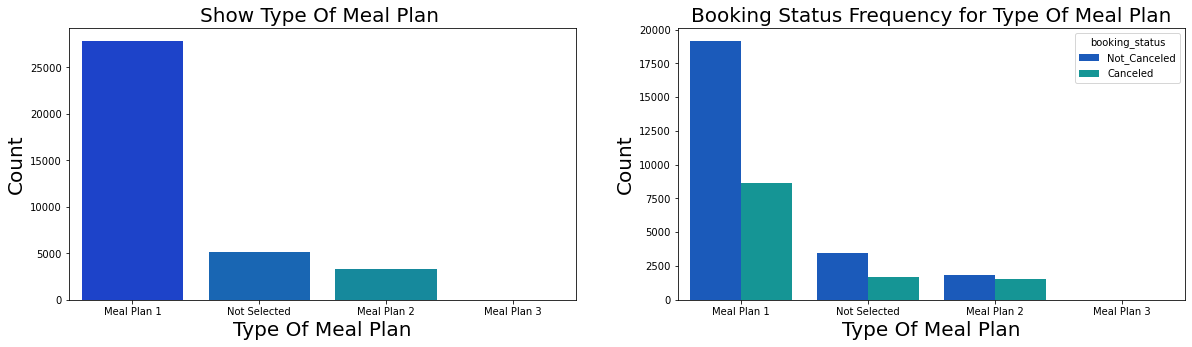

In [49]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x = data['type_of_meal_plan'], palette='winter')
plt.title('Show Type Of Meal Plan ',fontsize=20)
plt.xlabel('Type Of Meal Plan',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(1,2,2)
sns.countplot(x = data['type_of_meal_plan'],hue=data['booking_status'], palette='winter')
plt.title('Booking Status Frequency for Type Of Meal Plan',fontsize=20)
plt.xlabel('Type Of Meal Plan',fontsize=20)
plt.ylabel('Count',fontsize=20)

In [50]:
#how many required_car_parking_space
data['required_car_parking_space'].value_counts()

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

In [51]:
data.groupby(['required_car_parking_space','booking_status'])['booking_status'].count()

required_car_parking_space  booking_status
0                           Canceled          11771
                            Not_Canceled      23380
1                           Canceled            114
                            Not_Canceled       1010
Name: booking_status, dtype: int64

Text(0, 0.5, 'Count')

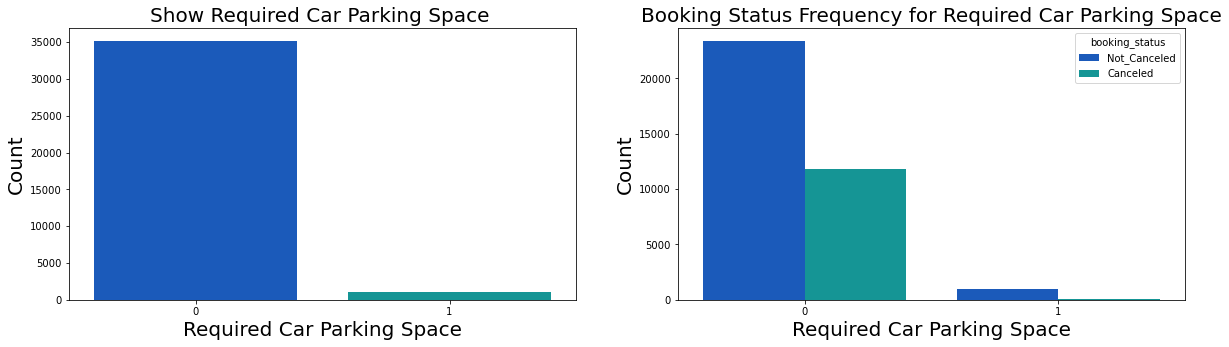

In [52]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x = data['required_car_parking_space'], palette='winter')
plt.title('Show Required Car Parking Space ',fontsize=20)
plt.xlabel('Required Car Parking Space',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(1,2,2)
sns.countplot(x = data['required_car_parking_space'],hue=data['booking_status'], palette='winter')
plt.title('Booking Status Frequency for Required Car Parking Space',fontsize=20)
plt.xlabel('Required Car Parking Space',fontsize=20)
plt.ylabel('Count',fontsize=20)

In [53]:
#how many room_type_reserved
data['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [54]:
data.groupby(['room_type_reserved','booking_status'])['booking_status'].count()

room_type_reserved  booking_status
Room_Type 1         Canceled           9072
                    Not_Canceled      19058
Room_Type 2         Canceled            228
                    Not_Canceled        464
Room_Type 3         Canceled              2
                    Not_Canceled          5
Room_Type 4         Canceled           2069
                    Not_Canceled       3988
Room_Type 5         Canceled             72
                    Not_Canceled        193
Room_Type 6         Canceled            406
                    Not_Canceled        560
Room_Type 7         Canceled             36
                    Not_Canceled        122
Name: booking_status, dtype: int64

Text(0, 0.5, 'Count')

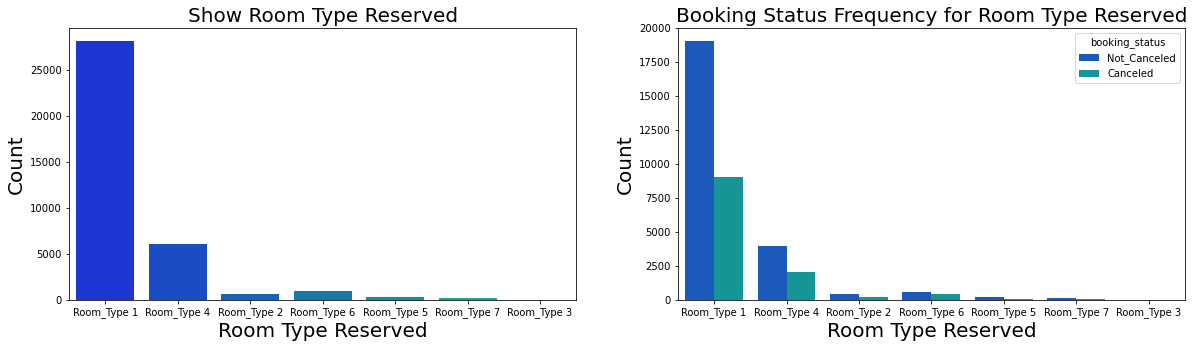

In [55]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x = data['room_type_reserved'], palette='winter')
plt.title('Show Room Type Reserved',fontsize=20)
plt.xlabel('Room Type Reserved',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(1,2,2)
sns.countplot(x = data['room_type_reserved'],hue=data['booking_status'], palette='winter')
plt.title('Booking Status Frequency for Room Type Reserved',fontsize=20)
plt.xlabel('Room Type Reserved',fontsize=20)
plt.ylabel('Count',fontsize=20)

# Check the Distribution and skewness of the features

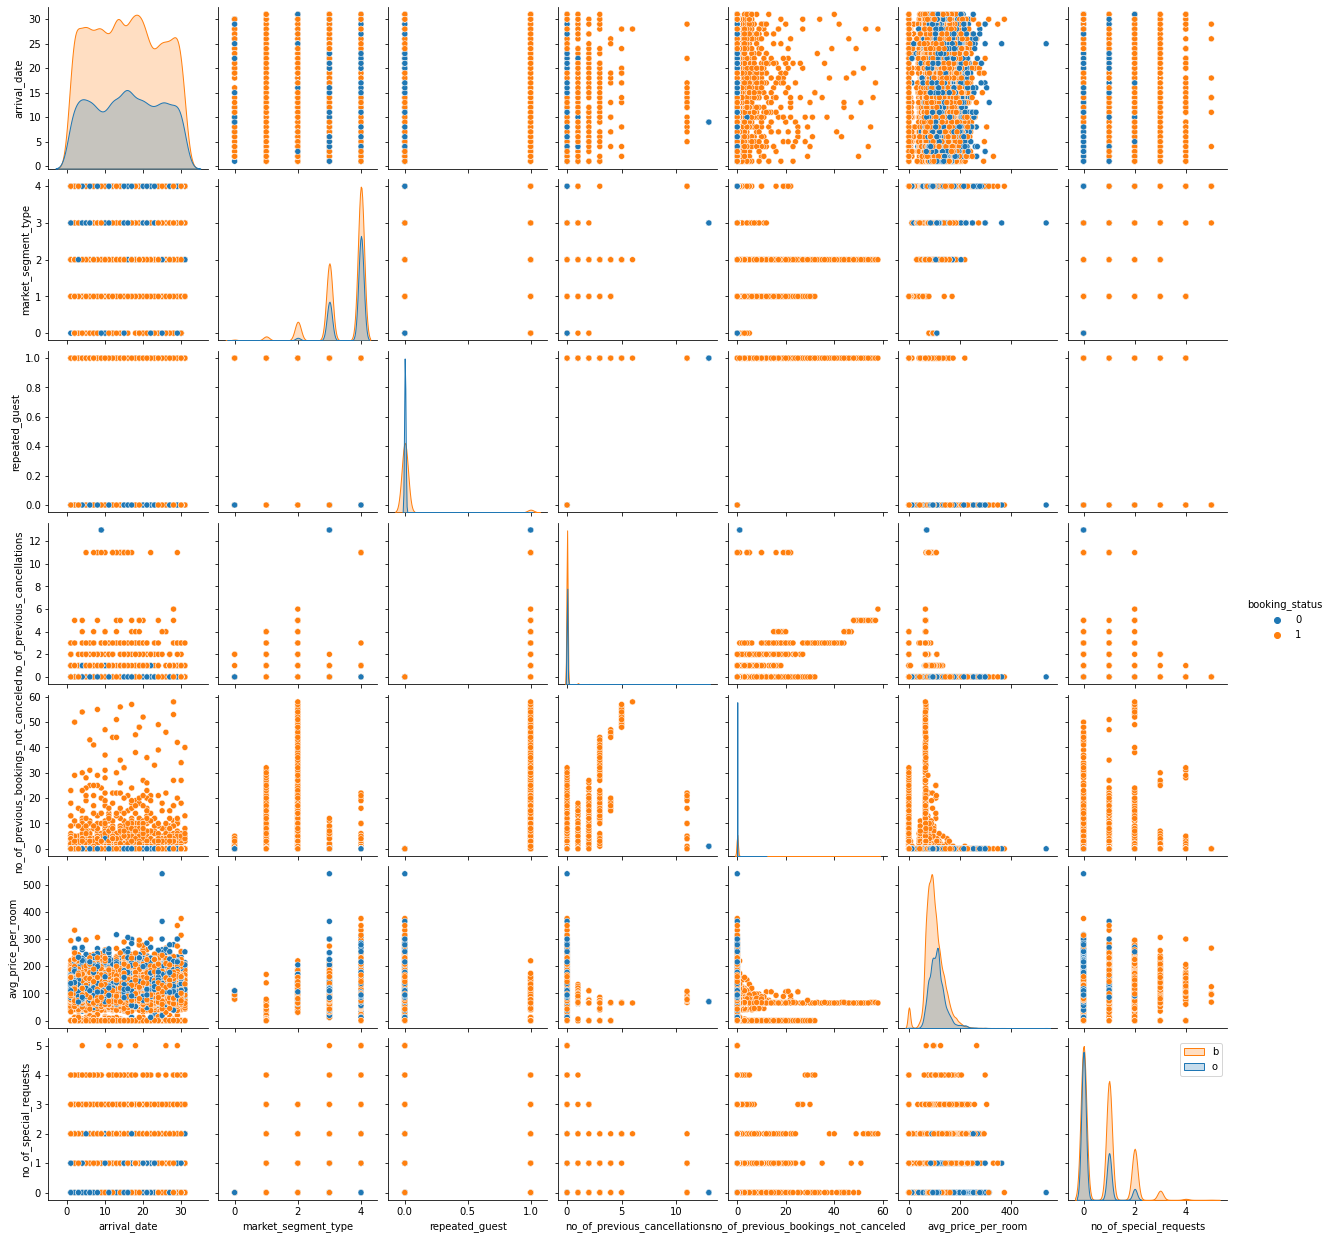

In [80]:
da=data.iloc[:,10:]
sns.pairplot(data=da, hue='booking_status')
plt.legend('booking_status')

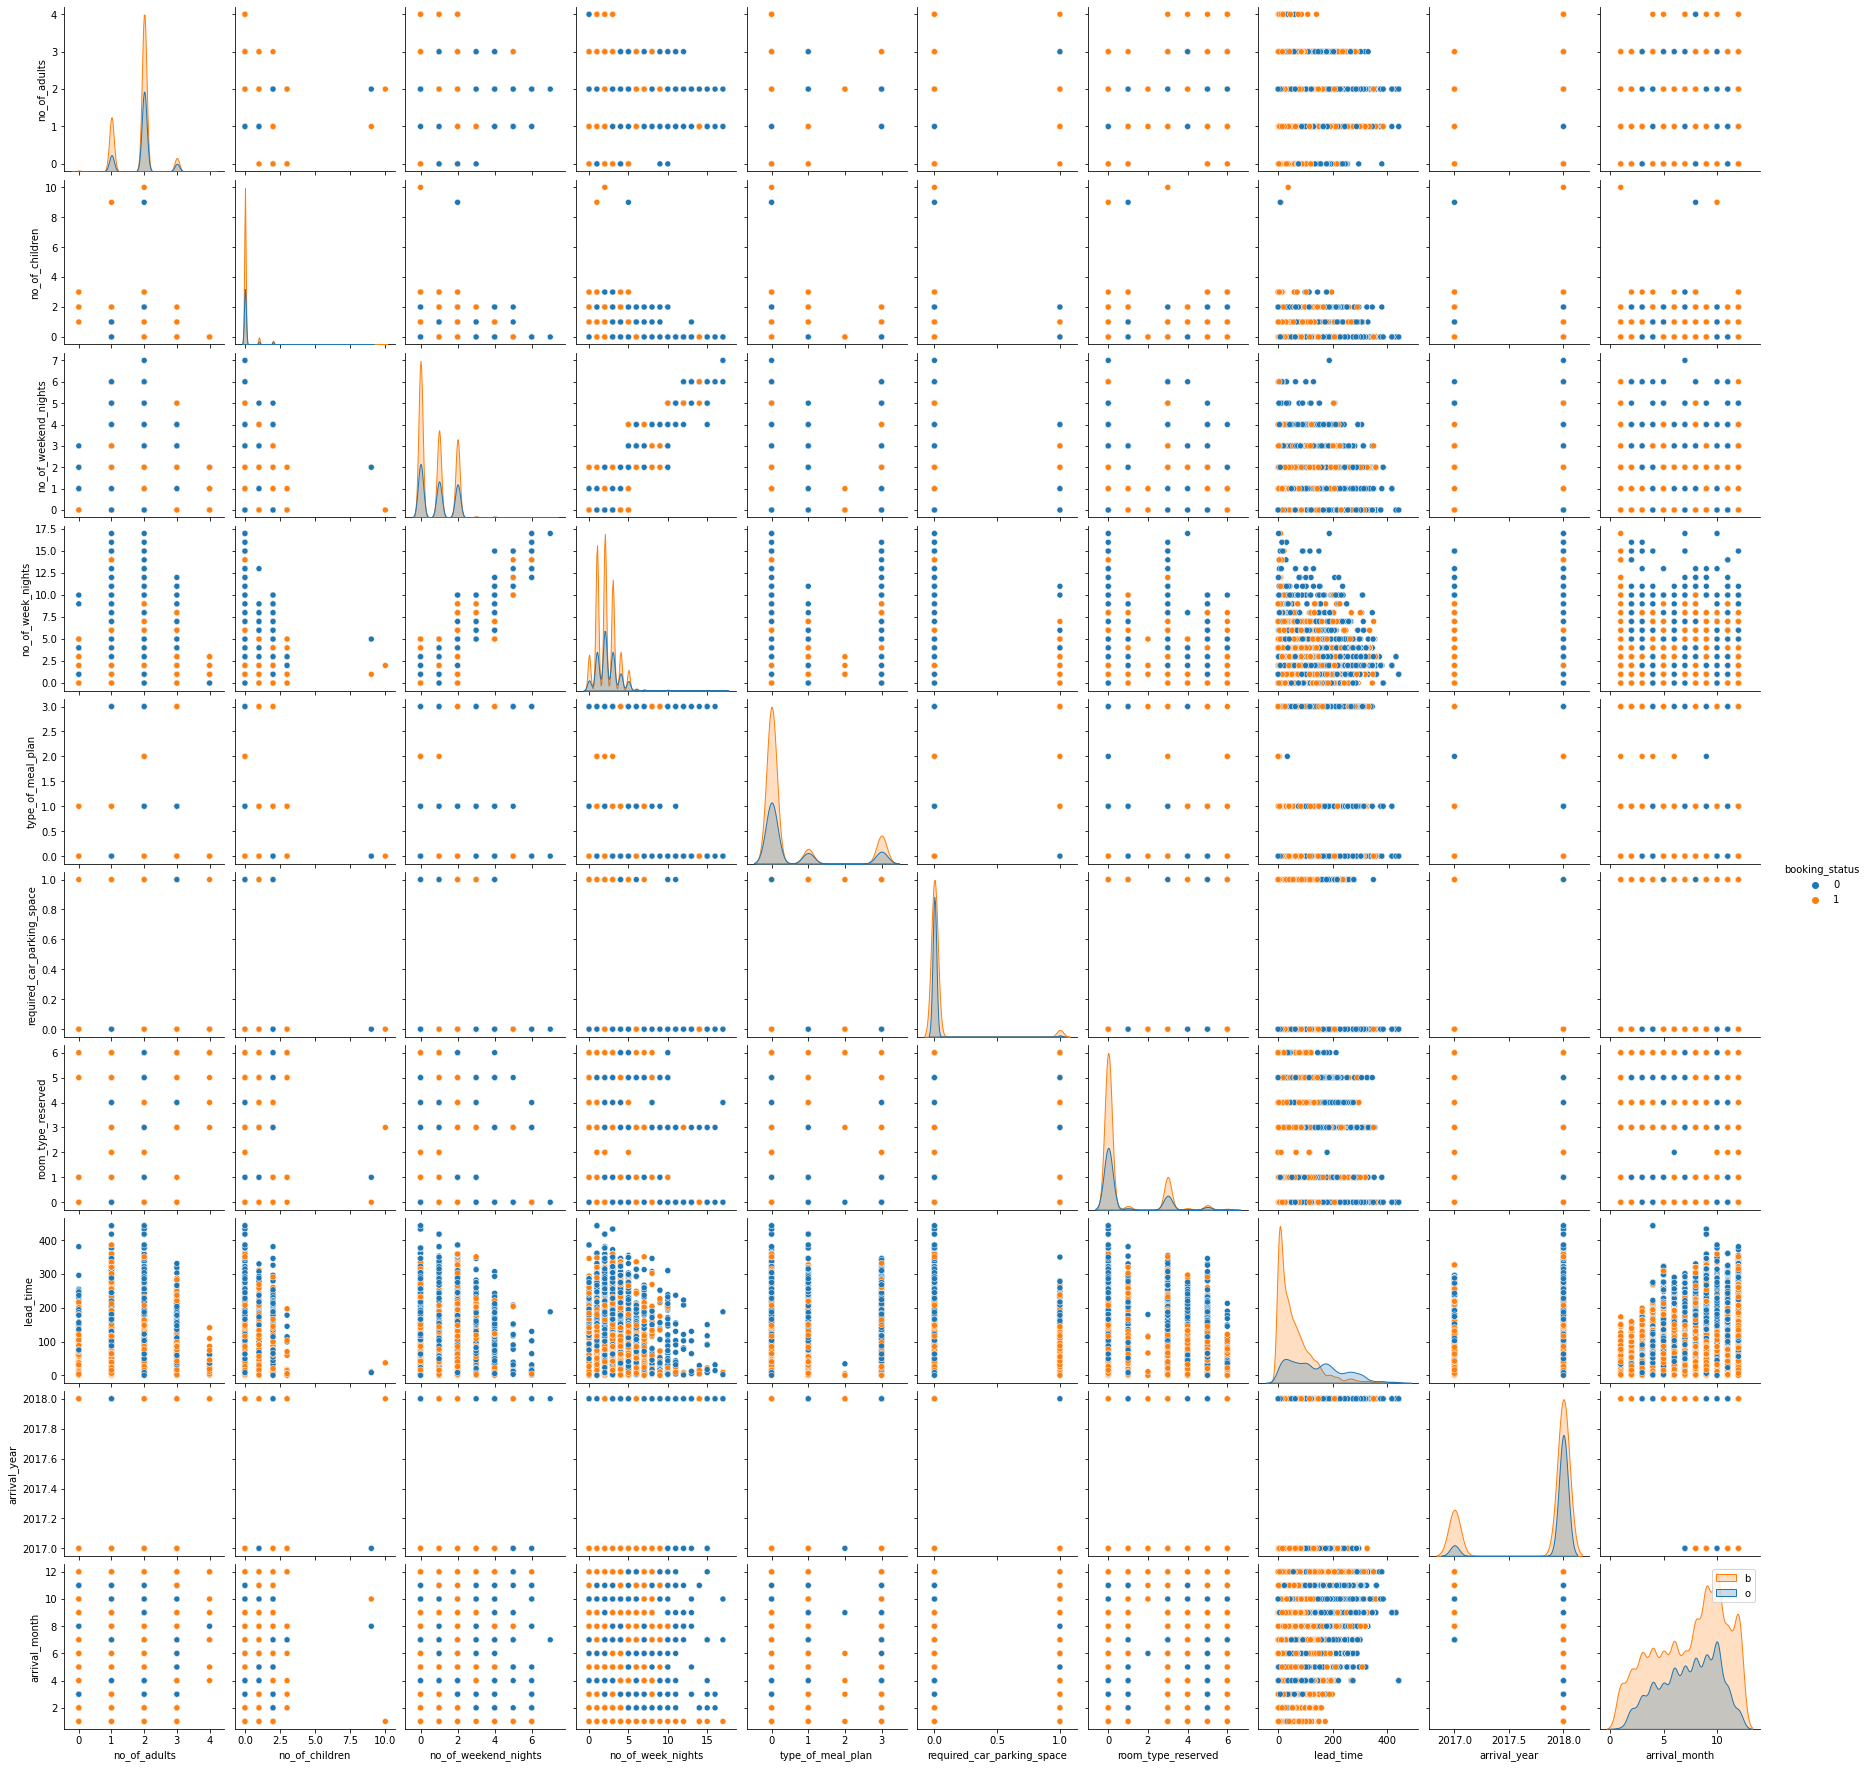

In [79]:
da=data.iloc[:,:10]
da['booking_status']=data['booking_status']
sns.pairplot(data=da, hue='booking_status')
plt.legend('booking_status')

# Object Columns

In [70]:
obj=data.select_dtypes(include=object).columns
pd.DataFrame(obj,columns=['Object Columns'])

,Object Columns
0,type_of_meal_plan
1,room_type_reserved
2,market_segment_type
3,booking_status


# Transform Object Columns

In [73]:
label=LabelEncoder()
for col in obj:
    data[col]=label.fit_transform(data[col])
data 

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,0,3,85,2018,8,3,4,0,0,0,167.80,1,1
36271,2,0,1,3,0,0,0,228,2018,10,17,4,0,0,0,90.95,2,0
36272,2,0,2,6,0,0,0,148,2018,7,1,4,0,0,0,98.39,2,1
36273,2,0,0,3,3,0,0,63,2018,4,21,4,0,0,0,94.50,0,0


# Show Data Correlation

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.025555,0.011429,0.270348,0.097287,0.076719,0.021841,0.026338,0.314103,-0.192277,-0.047426,-0.119166,0.296886,0.189401,-0.086920
no_of_children,-0.019787,1.000000,0.029478,0.024398,-0.086764,0.034244,0.364073,-0.047091,0.045983,-0.003076,0.025482,0.130618,-0.036348,-0.016390,-0.021189,0.337728,0.124486,-0.033078
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.027327,-0.031111,0.057368,0.046595,0.055357,-0.009894,0.027304,0.129069,-0.067107,-0.020690,-0.026312,-0.004525,0.060593,-0.061563
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.083431,-0.048784,0.094125,0.149650,0.032672,0.037376,-0.009305,0.112952,-0.099764,-0.030080,-0.049344,0.022753,0.045994,-0.092996
type_of_meal_plan,0.025555,-0.086764,-0.027327,-0.083431,1.000000,-0.012991,-0.209176,-0.060271,0.071396,0.008564,0.004833,0.203361,-0.062995,-0.011622,-0.038183,-0.069257,0.022091,-0.026706
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,-0.012991,1.000000,0.038778,-0.066445,0.015684,-0.015505,-0.000037,-0.003723,0.110909,0.027106,0.063810,0.061304,0.087922,0.086185
room_type_reserved,0.270348,0.364073,0.057368,0.094125,-0.209176,0.038778,1.000000,-0.107793,0.103369,-0.005967,0.032919,0.156610,-0.025826,-0.007936,-0.008139,0.469899,0.145041,-0.022986
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.060271,-0.066445,-0.107793,1.000000,0.143439,0.136814,0.006479,-0.006933,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645,-0.438538
arrival_year,0.076719,0.045983,0.055357,0.032672,0.071396,0.015684,0.103369,0.143439,1.000000,-0.339689,0.018849,0.150027,-0.018175,0.003919,0.026422,0.178605,0.053205,-0.179529
arrival_month,0.021841,-0.003076,-0.009894,0.037376,0.008564,-0.015505,-0.005967,0.136814,-0.339689,1.000000,-0.042780,-0.006311,0.000341,-0.038615,-0.010718,0.054423,0.110552,0.011233


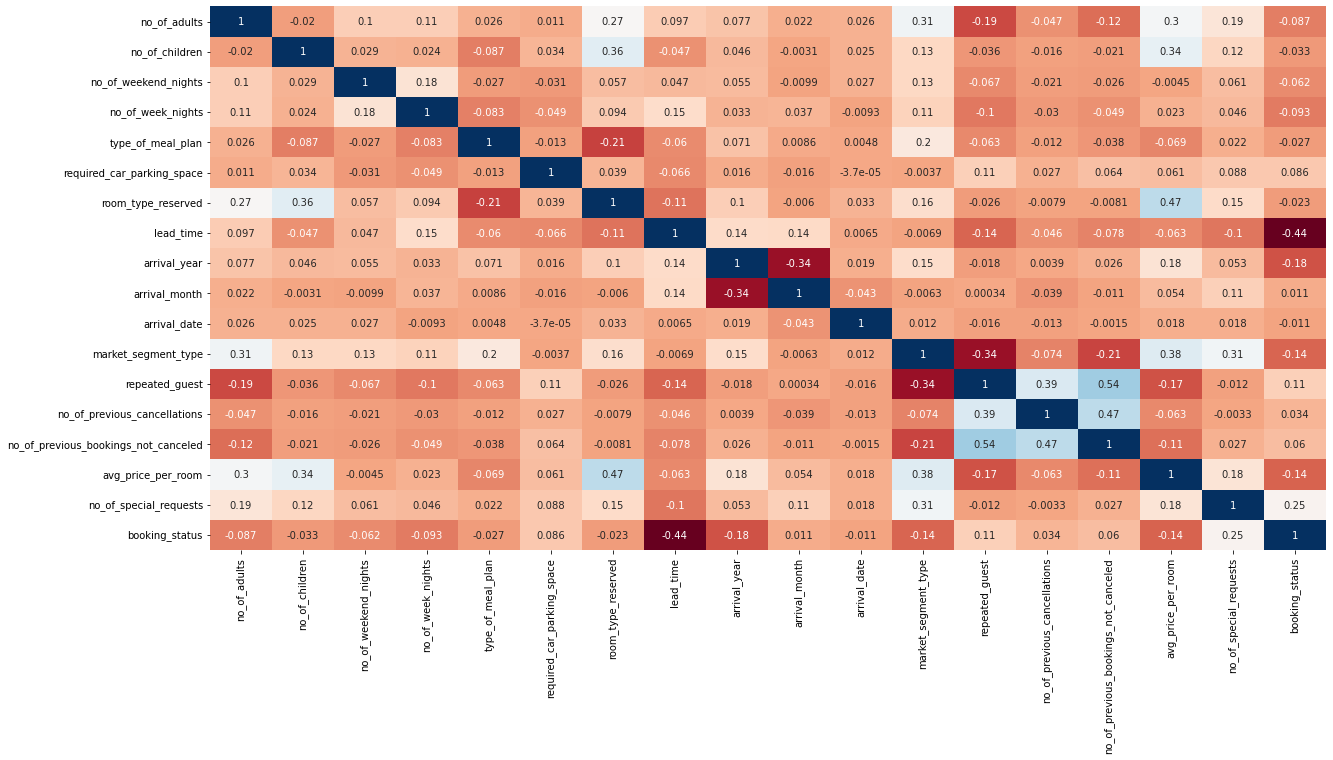

In [74]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cbar=False,cmap='RdBu')
data.corr()

# Show Input X and Output y

In [75]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
key=X.keys()

In [76]:
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,0,3,85,2018,8,3,4,0,0,0,167.80,1
36271,2,0,1,3,0,0,0,228,2018,10,17,4,0,0,0,90.95,2
36272,2,0,2,6,0,0,0,148,2018,7,1,4,0,0,0,98.39,2
36273,2,0,0,3,3,0,0,63,2018,4,21,4,0,0,0,94.50,0


In [77]:
y

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 36275, dtype: int64

In [78]:
smote=SMOTE(sampling_strategy='minority')
X,y=smote.fit_resample(X,y)
y.value_counts()

1    24390
0    24390
Name: booking_status, dtype: int64

# Model Building

In [90]:
class Model:
    def select_feature(self,model,X,y):
        FeatureSelection = SelectFromModel(estimator =model)
        X = FeatureSelection.fit_transform(X, y)
        print('X Shape is ' , X.shape)
        return FeatureSelection.get_support()
    def GridSearchCV(self,model_choose,SelectedParameters,X,y):
        GridSearchModel = GridSearchCV(model_choose,SelectedParameters, cv = 2,return_train_score=True)
        GridSearchModel.fit(X, y)
        print('Best Score is :', GridSearchModel.best_score_)
        print('Best Parameters are :', GridSearchModel.best_params_)
        print('Best Estimator is :', GridSearchModel.best_estimator_)
    def Splitting_Data(self,X,y,test_size):
        X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=33, shuffle =True)
        print('X_train shape is ' ,X_train.shape)
        print('X_test shape is ' ,X_test.shape)
        print('y_train shape is ' ,y_train.shape)
        print('y_test shape is ' , y_test.shape)
        print('y_train value count is :\n' ,y_train.value_counts())
        print('y_test value count is :\n' ,y_test.value_counts())
        return X_train,X_test,y_train,y_test
    def MinMax(self,key):
        scaler = MinMaxScaler(feature_range=(0, 1))
        X_scale = scaler.fit_transform(X)
        return pd.DataFrame(X_scale,columns=key)
    def model(self,model_bulding,X_train,y_train,X_test,y_test):
        model_bulding.fit(X_train,y_train)
        print('model_bulding Train Score is : ' , model_bulding.score(X_train,y_train))
        print('model_bulding Test Score is : ' , model_bulding.score(X_test,y_test))
        #print('model_bulding features importances are : ' , model_bulding.feature_importances_)
        return model_bulding
    def Prediction(self,model,X_test):
        self.y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)
        print('Predicted Value for model is : ' ,self.y_pred[:10])
        print('Prediction Probabilities Value for model is : ' , y_pred_prob[:10])
        return self.y_pred
    def Confusion_Matrix(self,y_test):
        ax= plt.subplot()
        CM = confusion_matrix(y_test,self.y_pred)
        sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('True labels') 
        ax.set_title('Confusion Matrix')
        ax.xaxis.set_ticklabels(['Negative' ,'Positive']) 
        ax.yaxis.set_ticklabels(['Negative' ,'Positive'])
        plt.show()
        return CM
    def classificationReport(self,y_test):
        ClassificationReport = classification_report(y_test,self.y_pred)
        print('Classification Report is : ', ClassificationReport )
    def accuracy(self,y_test):
        acc = accuracy_score(y_test,self.y_pred)
        print('Accuracy Score is : ', acc)
    def f1_score(self,y_test):
        F1Score = f1_score(y_test,self.y_pred)
        print('F1 Score is : ', F1Score)
    def recall(self,y_test):
        RecallScore = recall_score(y_test,self.y_pred) 
        print('Recall Score is : ', RecallScore)
    def Precision(self,y_test):
        PrecisionScore = precision_score(y_test,self.y_pred) 
        print('Precision Score is : ', PrecisionScore)

In [91]:
model1=Model()

# MinMax

In [92]:
X=model1.MinMax(X.keys())
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.50,0.0,0.142857,0.117647,0.000000,0.0,0.000000,0.505643,0.0,0.818182,0.033333,0.75,0.0,0.0,0.0,0.120370,0.0
1,0.50,0.0,0.285714,0.176471,1.000000,0.0,0.000000,0.011287,1.0,0.909091,0.166667,1.00,0.0,0.0,0.0,0.197556,0.2
2,0.25,0.0,0.285714,0.058824,0.000000,0.0,0.000000,0.002257,1.0,0.090909,0.900000,1.00,0.0,0.0,0.0,0.111111,0.0
3,0.50,0.0,0.000000,0.117647,0.000000,0.0,0.000000,0.476298,1.0,0.363636,0.633333,1.00,0.0,0.0,0.0,0.185185,0.0
4,0.50,0.0,0.142857,0.058824,1.000000,0.0,0.000000,0.108352,1.0,0.272727,0.333333,1.00,0.0,0.0,0.0,0.175000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48775,0.50,0.0,0.000000,0.117647,0.333333,0.0,0.000000,0.851016,1.0,0.818182,0.433333,0.75,0.0,0.0,0.0,0.212963,0.2
48776,0.50,0.0,0.000000,0.117647,0.333333,0.0,0.000000,0.128668,1.0,0.272727,0.400000,1.00,0.0,0.0,0.0,0.198608,0.0
48777,0.50,0.0,0.000000,0.000000,0.000000,0.0,0.500000,0.232506,1.0,0.727273,0.233333,1.00,0.0,0.0,0.0,0.279715,0.0
48778,0.50,0.0,0.000000,0.058824,0.000000,0.0,0.166667,0.573363,1.0,0.545455,0.266667,1.00,0.0,0.0,0.0,0.186481,0.2


# Splitting Data

In [93]:
X_train,X_test,y_train,y_test=model1.Splitting_Data(X,y,.05)

X_train shape is  (46341, 17)
X_test shape is  (2439, 17)
y_train shape is  (46341,)
y_test shape is  (2439,)
y_train value count is :
 1    23201
0    23140
Name: booking_status, dtype: int64
y_test value count is :
 0    1250
1    1189
Name: booking_status, dtype: int64


# RandomForestClassifier

In [94]:
feature1=model1.select_feature(RandomForestClassifier(n_estimators=100,max_depth=10,random_state=33),X,y)
X.iloc[:,feature1]

X Shape is  (48780, 5)


,lead_time,arrival_month,market_segment_type,avg_price_per_room,no_of_special_requests
0,0.505643,0.818182,0.75,0.120370,0.0
1,0.011287,0.909091,1.00,0.197556,0.2
2,0.002257,0.090909,1.00,0.111111,0.0
3,0.476298,0.363636,1.00,0.185185,0.0
4,0.108352,0.272727,1.00,0.175000,0.0
...,...,...,...,...,...
48775,0.851016,0.818182,0.75,0.212963,0.2
48776,0.128668,0.272727,1.00,0.198608,0.0
48777,0.232506,0.727273,1.00,0.279715,0.0
48778,0.573363,0.545455,1.00,0.186481,0.2


In [95]:
model1.GridSearchCV(RandomForestClassifier(n_estimators=100,max_depth=10,random_state=33),
                   {'max_depth':[5,10,15,20,25,30,35,40]},X.iloc[:,feature1],y)

Best Score is : 0.8856293562935629
Best Parameters are : {'max_depth': 20}
Best Estimator is : RandomForestClassifier(max_depth=20, random_state=33)


In [96]:
model_RandomForest=model1.model(RandomForestClassifier(n_estimators=100,max_depth=20,random_state=33)
                                ,X_train.iloc[:,feature1],y_train,X_test.iloc[:,feature1],y_test)

model_bulding Train Score is :  0.9724218294814527
model_bulding Test Score is :  0.9081590815908159


# XGBClassifier

In [107]:
feature2=model1.select_feature(xgb.XGBClassifier(max_depth=10),X,y)
X.iloc[:,feature2]

X Shape is  (48780, 5)


,required_car_parking_space,lead_time,market_segment_type,repeated_guest,no_of_special_requests
0,0.0,0.505643,0.75,0.0,0.0
1,0.0,0.011287,1.00,0.0,0.2
2,0.0,0.002257,1.00,0.0,0.0
3,0.0,0.476298,1.00,0.0,0.0
4,0.0,0.108352,1.00,0.0,0.0
...,...,...,...,...,...
48775,0.0,0.851016,0.75,0.0,0.2
48776,0.0,0.128668,1.00,0.0,0.0
48777,0.0,0.232506,1.00,0.0,0.0
48778,0.0,0.573363,1.00,0.0,0.2


In [109]:
model1.GridSearchCV(xgb.XGBClassifier(max_depth=10),
                   {'max_depth':[15,20,25,30,35,40,45,50]},X,y)

Best Score is : 0.8991184911849118
Best Parameters are : {'max_depth': 50}
Best Estimator is : XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=50, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [104]:
xgb_classifier=model1.model(xgb.XGBClassifier(max_depth=20),X_train.iloc[:,feature1],y_train,X_test.iloc[:,feature1],y_test)

model_bulding Train Score is :  0.9810534947454738
model_bulding Test Score is :  0.9114391143911439


# DecisionTreeClassifier

In [112]:
feature3=model1.select_feature(DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=33),X,y)
X.iloc[:,feature3]

X Shape is  (48780, 5)


,lead_time,arrival_month,market_segment_type,avg_price_per_room,no_of_special_requests
0,0.505643,0.818182,0.75,0.120370,0.0
1,0.011287,0.909091,1.00,0.197556,0.2
2,0.002257,0.090909,1.00,0.111111,0.0
3,0.476298,0.363636,1.00,0.185185,0.0
4,0.108352,0.272727,1.00,0.175000,0.0
...,...,...,...,...,...
48775,0.851016,0.818182,0.75,0.212963,0.2
48776,0.128668,0.272727,1.00,0.198608,0.0
48777,0.232506,0.727273,1.00,0.279715,0.0
48778,0.573363,0.545455,1.00,0.186481,0.2


In [108]:
model1.GridSearchCV(DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=33),
                   {'max_depth':[15,20,25,30,35,40,45,50]},X,y)

Best Score is : 0.8726322263222632
Best Parameters are : {'max_depth': 20}
Best Estimator is : DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=33)


In [113]:
model_DecisionTree=model1.model(DecisionTreeClassifier(criterion='entropy',max_depth=20,random_state=33),
                               X_train.iloc[:,feature3],y_train,X_test.iloc[:,feature3],y_test)

model_bulding Train Score is :  0.9471526294210311
model_bulding Test Score is :  0.8860188601886019


# VotingClassifier

In [124]:
VotingClassifierModel=model1.model(VotingClassifier(estimators=[('model_RandomForest',model_RandomForest),
                                                                ('model_DecisionTree',model_DecisionTree),
                                                                ('xgb_classifier',xgb_classifier)], voting='hard'),
                                      X_train.iloc[:,feature1],y_train,X_test.iloc[:,feature1],y_test)

model_bulding Train Score is :  0.9753134373448997
model_bulding Test Score is :  0.906109061090611


# Summary

In [125]:
models={'RandomForestClassifier':{'Train':97.2,'Test':90.8}
        ,'DecisionTreeClassifier':{'Train':94.7,'Test':88.6}
       ,'XGBClassifier':{'Train':98.1,'Test':91.1}
       ,'VotingClassifier':{'Train':97.5,'Test':90.6}}
pd.DataFrame(models)

,RandomForestClassifier,DecisionTreeClassifier,XGBClassifier,VotingClassifier
Train,97.2,94.7,98.1,97.5
Test,90.8,88.6,91.1,90.6


# Feature Importances

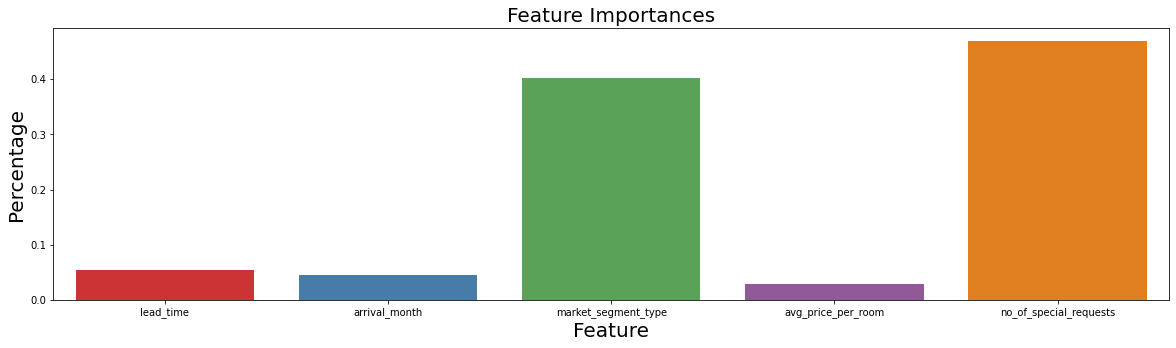

In [127]:
plt.figure(figsize=(20,5))
sns.barplot(x=X.iloc[:,feature1].keys(),y=xgb_classifier.feature_importances_,palette='Set1')
plt.title('Feature Importances',fontsize=20)
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Percentage',fontsize=20)
plt.show()

# Prediction

In [128]:
y_pred=model1.Prediction(xgb_classifier,X_test.iloc[:,feature1])

Predicted Value for model is :  [1 1 1 0 1 1 0 1 1 0]
Prediction Probabilities Value for model is :  [[5.0249338e-02 9.4975066e-01]
 [8.7777555e-02 9.1222245e-01]
 [1.4277196e-01 8.5722804e-01]
 [9.7365439e-01 2.6345627e-02]
 [1.6898578e-01 8.3101422e-01]
 [2.5629997e-05 9.9997437e-01]
 [6.7026126e-01 3.2973877e-01]
 [2.6451349e-03 9.9735487e-01]
 [3.7395954e-04 9.9962604e-01]
 [9.9995470e-01 4.5300956e-05]]


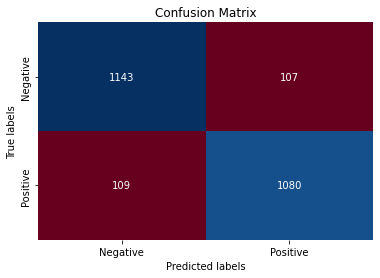

array([[1143,  107],
       [ 109, 1080]])

In [129]:
model1.Confusion_Matrix(y_test)

In [132]:
model1.accuracy(y_test)

Accuracy Score is :  0.9114391143911439


In [133]:
model1.f1_score(y_test)

F1 Score is :  0.9090909090909091


In [134]:
model1.recall(y_test)

Recall Score is :  0.9083263246425568


In [135]:
model1.Precision(y_test)

Precision Score is :  0.9098567818028643


In [136]:
model1.classificationReport(y_test)

Classification Report is :                precision    recall  f1-score   support

           0       0.91      0.91      0.91      1250
           1       0.91      0.91      0.91      1189

    accuracy                           0.91      2439
   macro avg       0.91      0.91      0.91      2439
weighted avg       0.91      0.91      0.91      2439



# Save Model

In [138]:
pk.dump(xgb_classifier, open('/kaggle/working/HotelModel.sav','wb'))

In [139]:
model=pk.load(open('/kaggle/working/HotelModel.sav','rb'))